In [1]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
random.seed(42)

from apidata import closing_prices

In [2]:
weights = np.random.random(10)
weights /= np.sum(weights)
weights

array([0.04747087, 0.0976154 , 0.13805837, 0.09815732, 0.10080159,
       0.09417035, 0.07950805, 0.12396062, 0.10335705, 0.11690038])

In [3]:
test_df = pd.DataFrame(
        np.random.random(100).reshape(10,-1), 
        columns="a,b,c,d,e,f,g,h,i,j".split(",")
        ).apply(lambda x: round(x*100, 4))

test_df.head()

,a,b,c,d,e,f,g,h,i,j
0,19.4743,95.0122,10.4074,57.7641,96.9560,73.0478,97.5486,21.4467,76.9150,57.5443
1,38.8771,76.7804,2.5767,13.9496,7.0933,60.4199,70.3324,31.5658,36.5766,96.0556
2,65.9266,11.1037,20.2563,18.3690,68.7799,97.8179,51.0204,51.4074,91.9442,98.3280
3,69.2373,34.5583,0.9771,88.5454,95.9598,32.1787,14.4896,40.5696,26.6139,4.4683
4,73.9123,92.2213,73.2995,0.2348,38.7059,81.5704,6.4404,1.1504,32.0305,46.8645


In [4]:
pfolio = np.sum(test_df).pct_change().iloc[1:]
pfolio.head()

b   -0.059815
c   -0.618592
d    1.203476
e    0.203576
f    0.400775
dtype: float64

In [5]:
pct_returns = round(test_df.pct_change(), 4).iloc[1:]
pct_returns.head()

,a,b,c,d,e,f,g,h,i,j
1,0.9963,-0.1919,-0.7524,-0.7585,-0.9268,-0.1729,-0.2790,0.4718,-0.5245,0.6692
2,0.6958,-0.8554,6.8613,0.3168,8.6965,0.6190,-0.2746,0.6286,1.5137,0.0237
3,0.0502,2.1123,-0.9518,3.8204,0.3952,-0.6710,-0.7160,-0.2108,-0.7105,-0.9546
4,0.0675,1.6686,74.0174,-0.9973,-0.5966,1.5349,-0.5555,-0.9716,0.2035,9.4882
5,-0.1146,-0.8987,-0.8987,120.5247,-0.5636,-0.0616,-0.3687,65.5275,-0.2419,-0.2697


In [6]:
log_returns = round(np.log(test_df/test_df.shift(1)).iloc[1:], 4)
log_returns.head()

,a,b,c,d,e,f,g,h,i,j
1,0.6913,-0.2131,-1.3960,-1.4209,-2.6151,-0.1898,-0.3271,0.3865,-0.7433,0.5124
2,0.5281,-1.9337,2.0620,0.2752,2.2718,0.4818,-0.3210,0.4877,0.9218,0.0234
3,0.0490,1.1354,-3.0316,1.5729,0.3330,-1.1118,-1.2588,-0.2368,-1.2397,-3.0913
4,0.0653,0.9815,4.3177,-5.9325,-0.9079,0.9302,-0.8108,-3.5629,0.1853,2.3503
5,-0.1217,-2.2895,-2.2901,4.8001,-0.8291,-0.0636,-0.4600,4.1976,-0.2770,-0.3143


In [7]:
pct_returns.corr()

,a,b,c,d,e,f,g,h,i,j
a,1.000000,-0.664016,-0.106694,-0.254312,-0.003643,0.053823,-0.226324,-0.180733,0.222062,-0.328244
b,-0.664016,1.000000,0.060745,-0.235084,-0.082042,-0.099220,0.029129,-0.364141,-0.218139,0.321883
c,-0.106694,0.060745,1.000000,-0.190703,-0.137476,0.883103,-0.165603,-0.166334,0.146598,0.512914
d,-0.254312,-0.235084,-0.190703,1.000000,-0.193727,-0.161556,-0.149915,0.988273,-0.233469,-0.213268
e,-0.003643,-0.082042,-0.137476,-0.193727,1.000000,0.176244,0.073838,-0.201374,0.723669,-0.248932
f,0.053823,-0.099220,0.883103,-0.161556,0.176244,1.000000,-0.151998,-0.131180,0.532181,0.445100
g,-0.226324,0.029129,-0.165603,-0.149915,0.073838,-0.151998,1.000000,-0.137264,-0.101012,-0.263193
h,-0.180733,-0.364141,-0.166334,0.988273,-0.201374,-0.131180,-0.137264,1.000000,-0.202986,-0.199666
i,0.222062,-0.218139,0.146598,-0.233469,0.723669,0.532181,-0.101012,-0.202986,1.000000,0.247083
j,-0.328244,0.321883,0.512914,-0.213268,-0.248932,0.445100,-0.263193,-0.199666,0.247083,1.000000


In [8]:
log_returns.corr()

,a,b,c,d,e,f,g,h,i,j
a,1.000000,-0.682183,0.003119,-0.506011,-0.331535,0.111181,-0.105920,-0.033253,0.091136,-0.185714
b,-0.682183,1.000000,0.112858,-0.052687,0.076888,-0.190245,-0.009761,-0.554019,-0.292453,0.205639
c,0.003119,0.112858,1.000000,-0.650038,0.128112,0.838101,-0.042908,-0.564854,0.686526,0.659497
d,-0.506011,-0.052687,-0.650038,1.000000,0.317480,-0.544641,0.008814,0.790737,-0.240634,-0.300264
e,-0.331535,0.076888,0.128112,0.317480,1.000000,0.038357,0.256407,-0.050843,0.452371,-0.234397
f,0.111181,-0.190245,0.838101,-0.544641,0.038357,1.000000,0.056069,-0.361947,0.783452,0.686620
g,-0.105920,-0.009761,-0.042908,0.008814,0.256407,0.056069,1.000000,-0.030263,0.182809,-0.358999
h,-0.033253,-0.554019,-0.564854,0.790737,-0.050843,-0.361947,-0.030263,1.000000,-0.161224,-0.260326
i,0.091136,-0.292453,0.686526,-0.240634,0.452371,0.783452,0.182809,-0.161224,1.000000,0.500521
j,-0.185714,0.205639,0.659497,-0.300264,-0.234397,0.686620,-0.358999,-0.260326,0.500521,1.000000


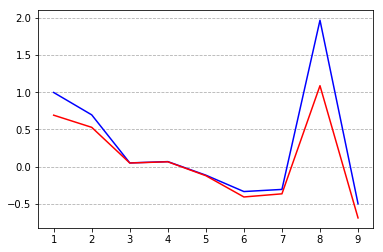

In [9]:
pct_returns["a"].plot(color="blue")
log_returns["a"].plot(color="red")
plt.grid(axis="y", linestyle="dashed")
plt.show()

In [10]:
Prtn_A = np.sum(pct_returns * weights)
Prtn_A

a     0.119793
b     1.072862
c    11.420727
d    13.815014
e     1.046310
f     0.120952
g     1.266945
h     7.935773
i     0.119760
j     2.813780
dtype: float64

In [11]:
allocation = zip(pct_returns.columns, weights)
for x in allocation:
    col, wt = x[0], x[1]
    pct_returns[col] = pct_returns[col].apply(lambda x: round(x * wt, 4))

pct_returns.head()

,a,b,c,d,e,f,g,h,i,j
1,0.0473,-0.0187,-0.1039,-0.0745,-0.0934,-0.0163,-0.0222,0.0585,-0.0542,0.0782
2,0.0330,-0.0835,0.9473,0.0311,0.8766,0.0583,-0.0218,0.0779,0.1565,0.0028
3,0.0024,0.2062,-0.1314,0.3750,0.0398,-0.0632,-0.0569,-0.0261,-0.0734,-0.1116
4,0.0032,0.1629,10.2187,-0.0979,-0.0601,0.1445,-0.0442,-0.1204,0.0210,1.1092
5,-0.0054,-0.0877,-0.1241,11.8304,-0.0568,-0.0058,-0.0293,8.1228,-0.0250,-0.0315


In [12]:
Prtn_B = np.sum(pct_returns)
Prtn_B

a     0.1199
b     1.0730
c    11.4206
d    13.8149
e     1.0464
f     0.1209
g     1.2669
h     7.9358
i     0.1197
j     2.8138
dtype: float64

In [13]:
Prtn_Var = round(Prtn_A/Prtn_B, 2)
Prtn_Var.head()

a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
dtype: float64

In [14]:
type(Prtn_B)

pandas.core.series.Series

In [23]:
pct_returns.iloc[0]

a    0.0473
b   -0.0187
c   -0.1039
d   -0.0745
e   -0.0934
f   -0.0163
g   -0.0222
h    0.0585
i   -0.0542
j    0.0782
Name: 1, dtype: float64

In [24]:
np.sum(pct_returns.iloc[0])

-0.1992

In [26]:
test_split = pct_returns.iloc[:10]
test_split.head()

,a,b,c,d,e,f,g,h,i,j
1,0.0473,-0.0187,-0.1039,-0.0745,-0.0934,-0.0163,-0.0222,0.0585,-0.0542,0.0782
2,0.0330,-0.0835,0.9473,0.0311,0.8766,0.0583,-0.0218,0.0779,0.1565,0.0028
3,0.0024,0.2062,-0.1314,0.3750,0.0398,-0.0632,-0.0569,-0.0261,-0.0734,-0.1116
4,0.0032,0.1629,10.2187,-0.0979,-0.0601,0.1445,-0.0442,-0.1204,0.0210,1.1092
5,-0.0054,-0.0877,-0.1241,11.8304,-0.0568,-0.0058,-0.0293,8.1228,-0.0250,-0.0315


In [30]:
test_split["RtnP"] = np.sum(test_split, axis=1)

C:\Users\Ryan Tamashiro\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
test_split.head()

,a,b,c,d,e,f,g,h,i,j,RtnP
1,0.0473,-0.0187,-0.1039,-0.0745,-0.0934,-0.0163,-0.0222,0.0585,-0.0542,0.0782,-0.1992
2,0.0330,-0.0835,0.9473,0.0311,0.8766,0.0583,-0.0218,0.0779,0.1565,0.0028,2.0782
3,0.0024,0.2062,-0.1314,0.3750,0.0398,-0.0632,-0.0569,-0.0261,-0.0734,-0.1116,0.1608
4,0.0032,0.1629,10.2187,-0.0979,-0.0601,0.1445,-0.0442,-0.1204,0.0210,1.1092,11.3369
5,-0.0054,-0.0877,-0.1241,11.8304,-0.0568,-0.0058,-0.0293,8.1228,-0.0250,-0.0315,19.5876
